# Regplot

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
diamonds = sns.load_dataset("diamonds")

diamonds.shape

(53940, 10)

In [3]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamonds = diamonds.sample(n=200, random_state=44)

diamonds.shape

(200, 10)

## Basics

In [5]:
sns.set_style("dark")

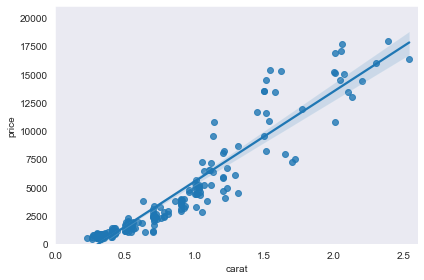

In [6]:
sns.regplot(data=diamonds, x="carat", y="price")
plt.xlim(0, 2.6)
plt.ylim(0, 21000)
plt.tight_layout()

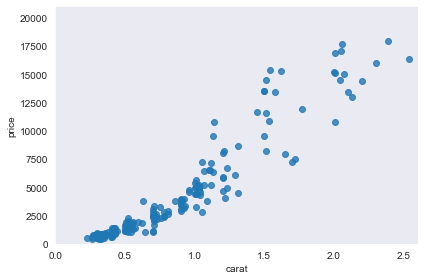

In [7]:
sns.regplot(data=diamonds, x="carat", y="price", fit_reg=False)
plt.xlim(0, 2.6)
plt.ylim(0, 21000)
plt.tight_layout()

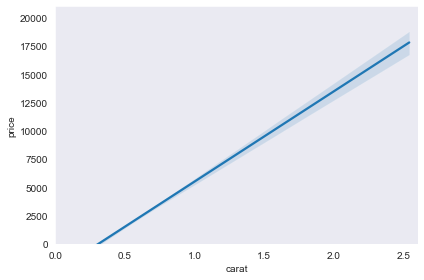

In [8]:
sns.regplot(data=diamonds, x="carat", y="price", scatter=False)
plt.xlim(0, 2.6)
plt.ylim(0, 21000)
plt.tight_layout()

## Reglot Options

### Confidence Intervals

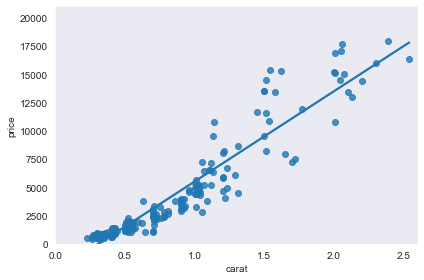

In [9]:
sns.regplot(data=diamonds, x="carat", y="price", ci=None)
plt.xlim(0, 2.6)
plt.ylim(0, 21000)
plt.tight_layout()

### Discrete Variable

In [10]:
cut_map = {
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Premium': 4,
    'Ideal': 5
}

diamonds['cut_value'] = diamonds.cut.map(cut_map).cat.as_ordered()

In [11]:
diamonds.cut_value.value_counts()

5    80
4    63
3    39
2    11
1     7
Name: cut_value, dtype: int64

### Jitter

In [12]:
# sns.regplot(data=diamonds, x="cut_value", y="price", x_jitter=0.2)
# plt.xlim(0, 2.6)
# plt.ylim(0, 21000)
# plt.tight_layout()

### Estimator Aggregate

In [13]:
import numpy as np

(0.5, 5.5)

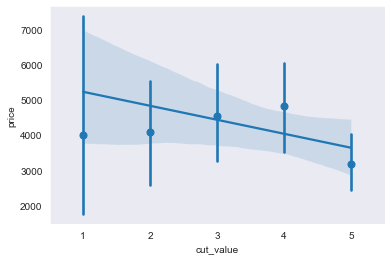

In [14]:
sns.regplot(data=diamonds, x="cut_value", y="price",
            x_estimator=np.mean)
plt.xlim(0.5, 5.5)

## Models

### Polynomial Regression (order)

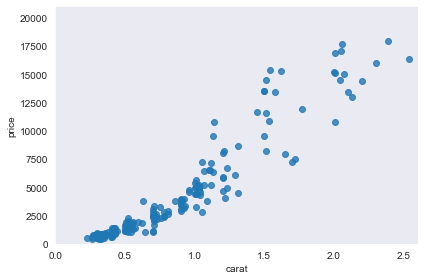

In [15]:
sns.regplot(data=diamonds, x="carat", y="price", fit_reg=False)
plt.xlim(0, 2.6)
plt.ylim(0, 21000)
plt.tight_layout()

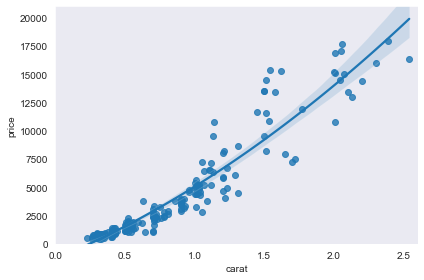

In [16]:
sns.regplot(data=diamonds, x="carat", y="price", order=2)
plt.xlim(0, 2.6)
plt.ylim(0, 21000)
plt.tight_layout()

### Robust Regression

In [17]:
x_example=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
y_example=[0.1, 0.8, 2.2, 2.7, 3.8, 4.5, 6.2, 6.8, 7.9, 9.4, 30.4]

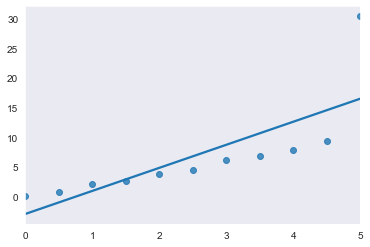

In [18]:
sns.regplot(x=x_example, 
            y=y_example,
            ci=None
            );

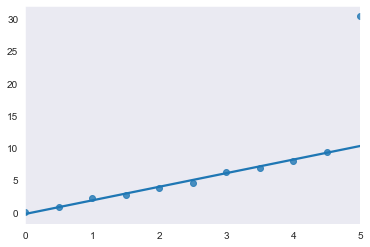

In [19]:
sns.regplot(x=x_example, 
            y=y_example,
            ci=None,
            robust=True
            );

## Styling

In [20]:
sns.set_style("white")

### marker

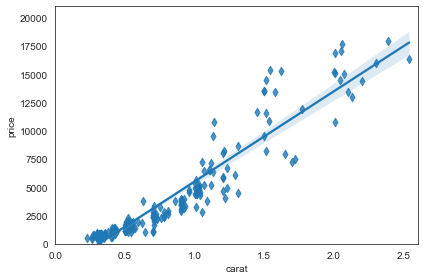

In [21]:
sns.regplot(data=diamonds, x="carat", y="price", marker="d")
plt.xlim(0, 2.6)
plt.ylim(0, 21000)
plt.tight_layout()

### sctter_kws

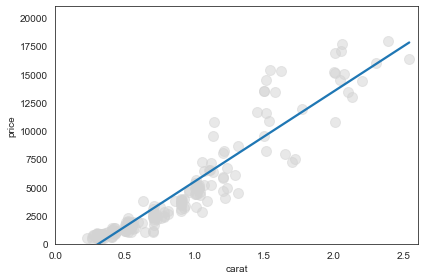

In [22]:
sns.regplot(data=diamonds, x="carat", y="price", 
            ci=None,
            scatter_kws={'s': 100, 'alpha': 0.5, 'color': 'lightgray'})
plt.xlim(0, 2.6)
plt.ylim(0, 21000)
plt.tight_layout()

### line_kws

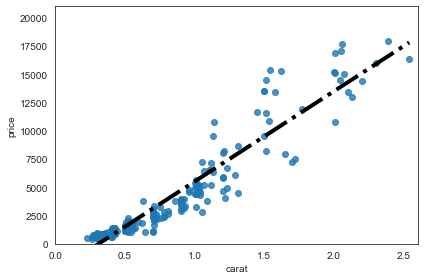

In [23]:
sns.regplot(data=diamonds, x="carat", y="price", 
            ci=None,
            line_kws={'lw': 4, 'color': 'black', 'linestyle': '-.'})
plt.xlim(0, 2.6)
plt.ylim(0, 21000)
plt.tight_layout()

## Related Seaborn Plots

In [24]:
blue, orange, green, red = sns.color_palette()[:4]

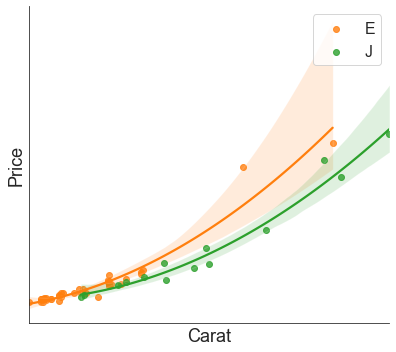

In [25]:
p = sns.lmplot(x='carat', y='price', 
               data=diamonds[diamonds.color.isin(['E', 'J'])], 
               hue='color', 
               order=2,
               palette=[green, orange])
plt.xlabel('Carat', fontsize=18)
plt.ylabel('Price', fontsize=18)
p._legend.remove()
plt.legend(fontsize=16)
plt.xticks([])
plt.yticks([])
plt.tight_layout();

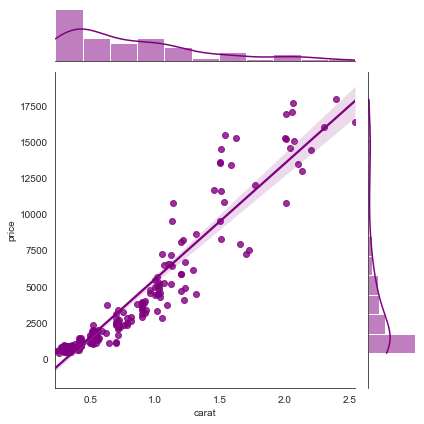

In [26]:
sns.jointplot(x='carat', y='price', data=diamonds, 
              kind='reg', 
              color='purple')
plt.xlabel('')
plt.ylabel('')
plt.xlim(-0.1, None)
plt.ylim(-2000, None)
plt.tight_layout();

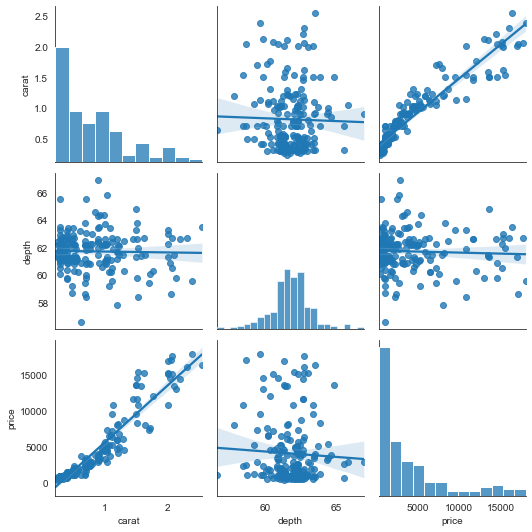

In [27]:
sns.pairplot(diamonds[['carat', 'depth', 'price']], 
             kind='reg', 
             palette='colorblind')
plt.tight_layout();